# TP Challenge

Replace your_name  by your name 

## Your task

Today you are a datascientist for a marketing saas company.
You have some data about your customer, a file with some features and the target **buy**.

The target variable is whether a customer will click 'Buy' on a website. Buy = 0 and Buy = 1 indicate 'no' and 'yes' respectively. Independent variables capture customer background and customer website navigation behavior information. First variable in the train.csv data file identifies each customer uniquely.

**The challenge is to correctly predict if a customer will click 'buy' on a website.**

In [1]:
train_path = './data/train.csv'
test_path = './data/test.csv'

## Importing Librairies

In [2]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing

- Check if missing values

- Check if duplicates ( if yes delete duplicated rows)

In [3]:
#Load datasets
trainData = pd.read_csv(train_path)
testData = pd.read_csv(test_path)

#Missing values
missing_train = trainData.isnull().sum().sort_values(ascending=False)/len(trainData)
missing_test = testData.isnull().sum().sort_values(ascending=False)/len(testData)

print("Missing values in train data :")
print(missing_train)
print("Missing values in test data :")
print(missing_test)

#Duplicate values
duplicates_train = trainData.duplicated().sum()
duplicates_test = testData.duplicated().sum()
print("Number of duplicates in train data :", duplicates_train)
print("Number of duplicates in test data :", duplicates_test)

if duplicates_train > 0 :
    trainData = duplicates_train.drop_duplicates().reset_index(drop = True)
    print("Duplicates of train data delete!")

if duplicates_test > 0 :
    testData = duplicates_test.drop_duplicates().reset_index(drop = True)
    print("Duplicates of test data delete!")

Missing values in train data :
Id     0.0
V56    0.0
V64    0.0
V63    0.0
V62    0.0
      ... 
V28    0.0
V27    0.0
V26    0.0
V25    0.0
Buy    0.0
Length: 87, dtype: float64
Missing values in test data :
Id     0.0
V55    0.0
V63    0.0
V62    0.0
V61    0.0
      ... 
V28    0.0
V27    0.0
V26    0.0
V25    0.0
V86    0.0
Length: 86, dtype: float64
Number of duplicates in train data : 0
Number of duplicates in test data : 0


## Visualization 

- Check if you have outliers in each features (columns) using seaborn or matplotlib
- Check the correlation between each columns ( seaborn can maybe help you.. )[https://seaborn.pydata.org/generated/seaborn.pairplot.html]

- Plot the distribution of the target


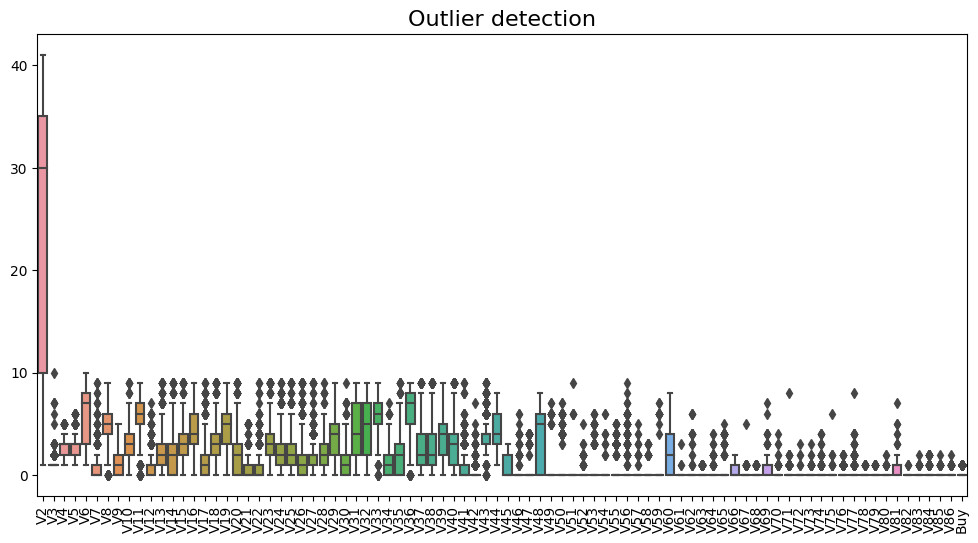

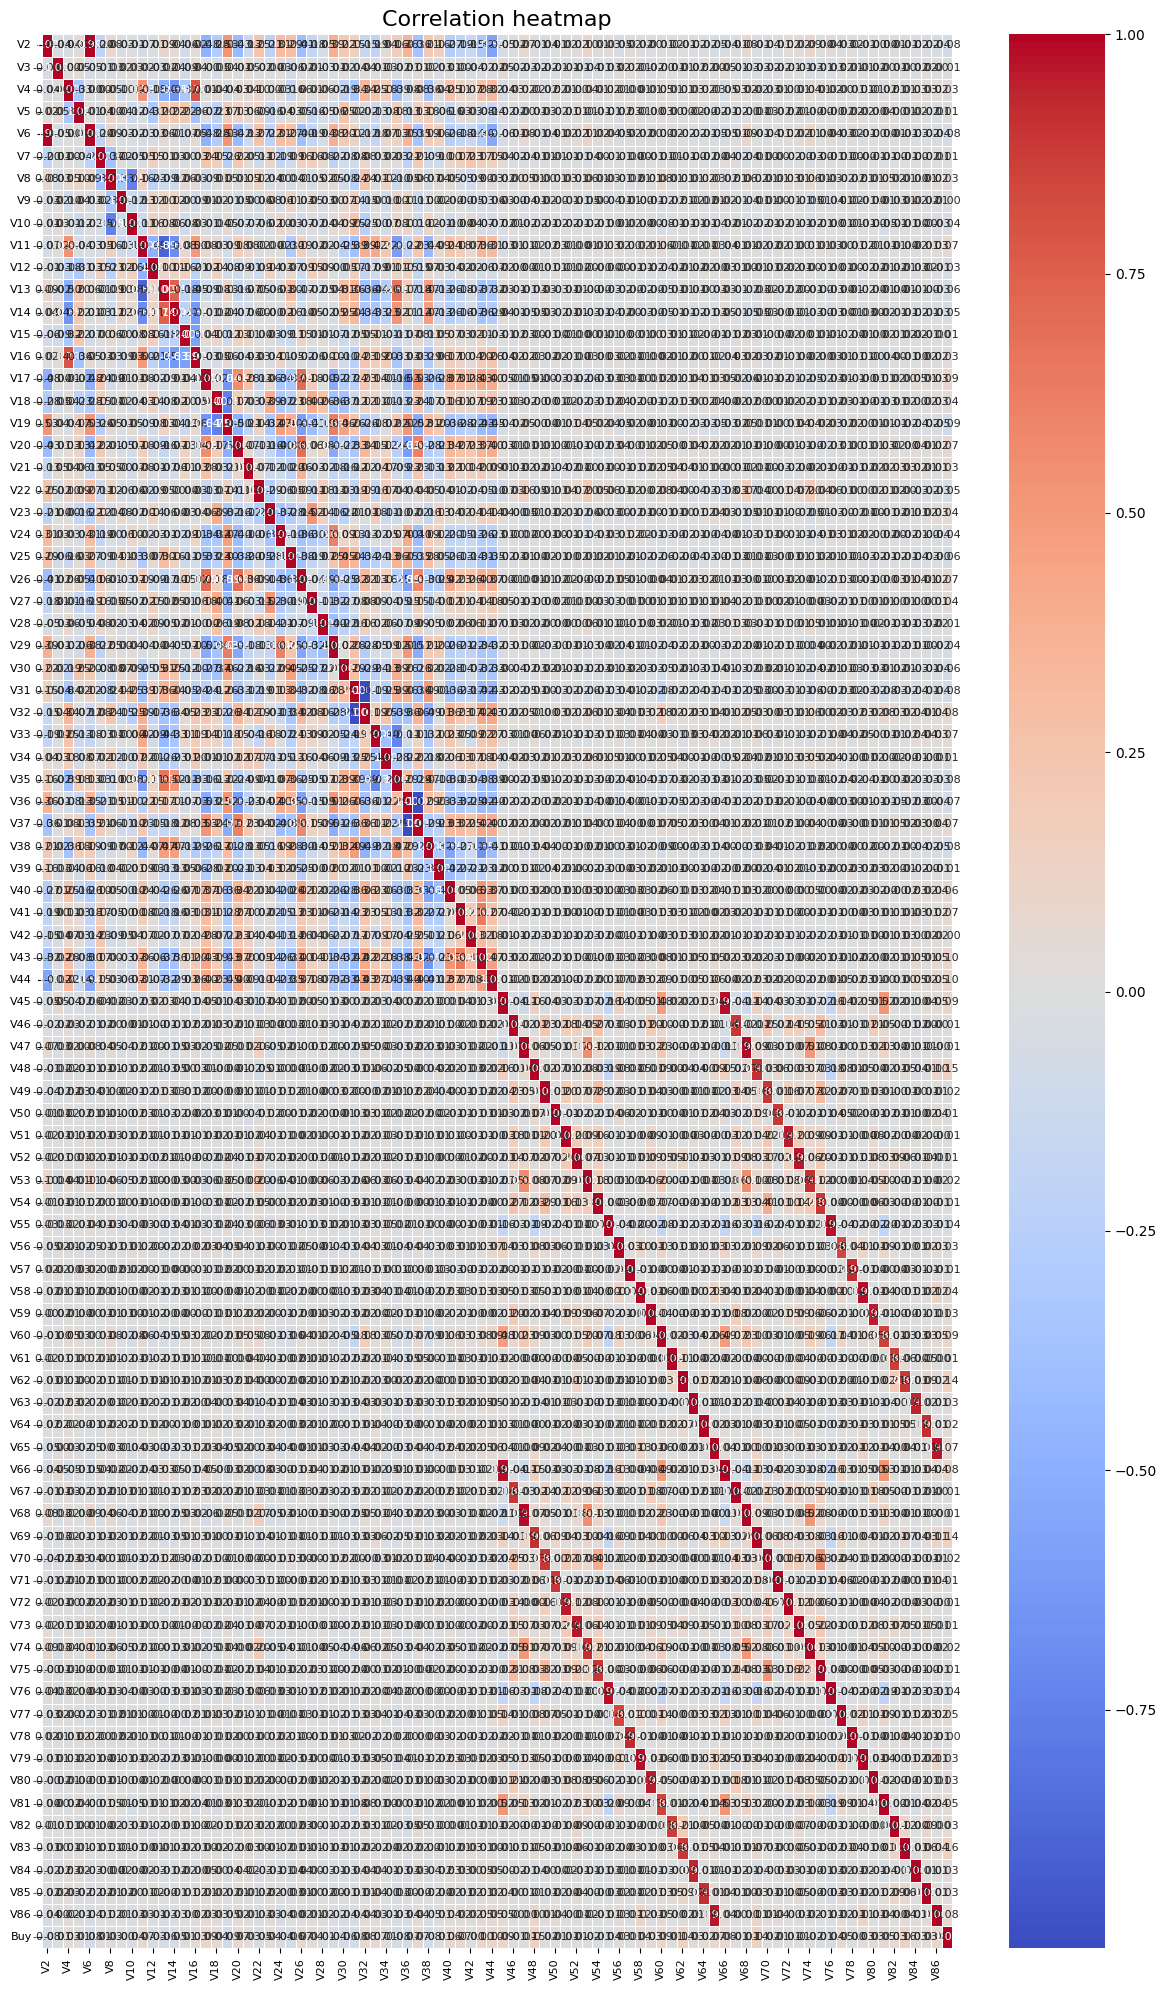

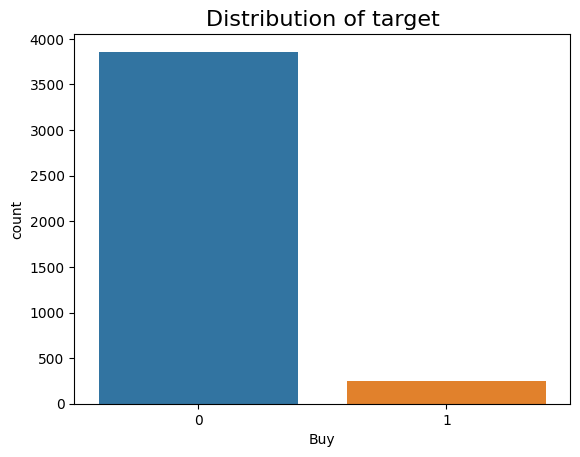

In [4]:
# Remove the ID column
trainData = trainData.drop("Id", axis=1)
testData = testData.drop("Id", axis=1)

# Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=trainData)
plt.xticks(rotation=90)
plt.title("Outlier detection", fontsize=16)
plt.show()

# Correlation Analysis
correlation_matrix = trainData.corr()
plt.figure(figsize=(12, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5, cmap="coolwarm", annot_kws={"fontsize": 8})
plt.title("Correlation heatmap", fontsize=16)
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Plot the distribution of the target variable
sns.countplot(x="Buy", data=trainData)
plt.title("Distribution of target", fontsize=16)
plt.show()



## Undersample your data

- Undersample the target with ( you may have to pip install -U imbalanced-learn)

from imblearn.over_sampling import RandomOverSampler, SMOTE

Ou 

from imblearn.under_sampling import RandomUnderSampler

In [5]:
# Import the necessary libraries
from imblearn.under_sampling import RandomUnderSampler

# Undersample the target variable
X_train = trainData.drop("Buy", axis=1)
y_train = trainData["Buy"]

undersampler = RandomUnderSampler()
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# Check the class distribution after undersampling
undersampled_counts = pd.Series(y_resampled).value_counts()
print("Class distribution after undersampling:\n", undersampled_counts)

Class distribution after undersampling:
 Buy
0    248
1    248
Name: count, dtype: int64


## Building models 

- Build a dummy model to have a baseline score

- Build a better model to classify your data and beat your baseline model

- Check the :
    - accuracy,
    - Recall,
    - Precision,
    - f1 score

- Plot your learning curve
--------------------------------









**⚠️(OPTIONAL)⚠️**
- Try to improve your first model by using a robust scaler or StandardScaler

- Try to use another  classifier model to improve your model performance

- Check the :
    - accuracy,
    - Recall,
    - Precision,
    - f1 score

- Plot your learning curve


Dummy Model:
Accuracy: 0.48322147651006714
Recall: 1.0
Precision: 0.48322147651006714
F1 Score: 0.6515837104072398
Better Model:
Accuracy: 0.7181208053691275
Recall: 0.6944444444444444
Precision: 0.7142857142857143
F1 Score: 0.7042253521126761


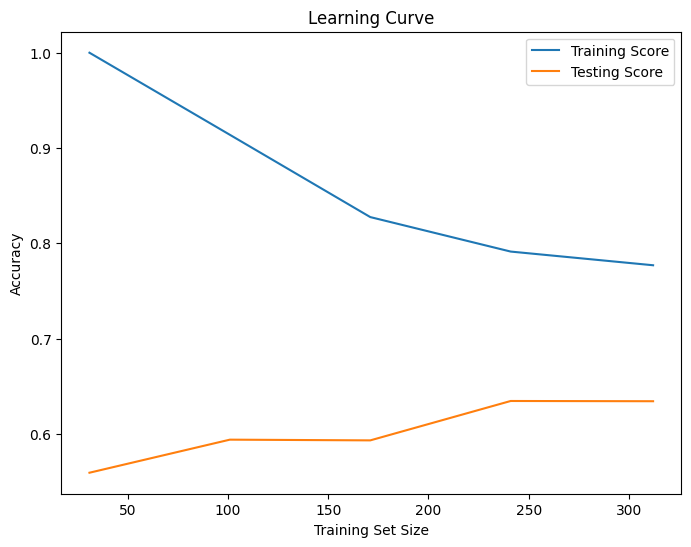

In [6]:
# Import the necessary libraries
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

# Create the training size slices
train_sizes = np.arange(100, 3300, 100)

# Create a dummy classifier
dummy_model = DummyClassifier(strategy="most_frequent")

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)

# Fit the dummy model on the training data
dummy_model.fit(X_train, y_train)

# Make predictions using the dummy model
dummy_predictions = dummy_model.predict(X_test)

# Calculate evaluation metrics for the dummy model
accuracy = accuracy_score(y_test, dummy_predictions)
recall = recall_score(y_test, dummy_predictions)
precision = precision_score(y_test, dummy_predictions, zero_division=0)
f1 = f1_score(y_test, dummy_predictions)

# Print the evaluation metrics
print("Dummy Model:")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve

# Create a logistic regression model
model = LogisticRegression(random_state=0, solver='lbfgs', max_iter=2000)

# Fit the model on the training data
model.fit(X_train, y_train)

# Perform predictions on the test data
predictions = model.predict(X_test)

# Calculate evaluation metrics for the model
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Print the evaluation metrics
print("Better Model:")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)


# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=10, scoring="accuracy")
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Testing Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Finish ?

add your code to a repos and send me the link by mail in the format :

the subject of the email will be **YOUR NAME | ML-IIM-challenge**

Send it to magloire.ndabagera@gmail.com at 5pm max.